<a href="https://colab.research.google.com/github/jtneumann/MLwork/blob/master/fastai/ml1/HousingPrices2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

!pip install -q fastai==0.7.0
!pip install -q pandas==0.23.4

In [0]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [0]:

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [4]:
data_raw = pd.read_csv('train.csv')

#a dataset should be broken into 3 splits: train, test, and (final) validation
#the test file provided is the validation file for competition submission
#we will split the train set into train and test data in future sections
data_val  = pd.read_csv('test.csv')


#to play with our data we'll create a copy
#remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
data1 = data_raw.copy(deep = True)

#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val]


#preview data
print (data_raw.info()) 
data_raw.sample(10).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,797,253,1356,579,1219,993,156,1184,791,357
Id,798,254,1357,580,1220,994,157,1185,792,358
MSSubClass,20,80,20,50,160,60,20,20,80,120
MSZoning,RL,RL,RL,RM,RM,RL,RL,RL,RL,RM
LotFrontage,57,85,NaN,81,21,68,60,50,NaN,44
LotArea,7677,9350,9477,12150,1680,8846,7200,35133,11333,4224
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Grvl,Pave,Pave
Alley,NaN,NaN,NaN,Grvl,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,IR1,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


changing SalePrice to log per evaluation on rmse

In [0]:
data_raw.SalePrice = np.log(data_raw.SalePrice)

In [6]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:
 Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,12.024051
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,0.399452
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,10.460242
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,11.775097
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,12.001505
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,12.273731


In [0]:
train_cats(data_raw)

In [0]:

df_trn, y_trn, nas = proc_df(data_raw, 'SalePrice')

In [0]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 1200
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(data_raw, n_trn)

In [0]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [11]:
df_trn.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
                 ..
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageYrBlt       0
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0


In [12]:
m=RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 107 ms, sys: 5.26 ms, total: 112 ms
Wall time: 128 ms
[0.08628465577163391, 0.16407078937028785, 0.9513472975632951, 0.8326287392462255, 0.8243046583544305]


In [13]:
m=RandomForestRegressor(n_estimators=40, min_samples_leaf=5, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 94.6 ms, sys: 3.59 ms, total: 98.2 ms
Wall time: 127 ms
[0.1087701075326849, 0.17066863660176673, 0.9226858576774248, 0.8188969390692757, 0.8075418466818698]


In [14]:
m=RandomForestRegressor(n_estimators=100, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 252 ms, sys: 21.9 ms, total: 274 ms
Wall time: 260 ms
[0.08749197930505673, 0.16285981308878814, 0.9499762425653309, 0.8350902943613127, 0.826342051154123]


In [15]:
m=RandomForestRegressor(n_estimators=160, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 410 ms, sys: 19.2 ms, total: 430 ms
Wall time: 294 ms
[0.0864718562329439, 0.1619259619190922, 0.951135957823567, 0.8369760830188093, 0.8315023507591623]


In [16]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 809 ms, sys: 20.4 ms, total: 830 ms
Wall time: 829 ms


(12.056012629699705, 0.19102651790813788)

In [17]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
17,OverallQual,0.263359
46,GrLivArea,0.211626
62,GarageArea,0.070819
19,YearBuilt,0.052940
38,TotalBsmtSF,0.046451
61,GarageCars,0.045614
27,ExterQual,0.037887
4,LotArea,0.024341
30,BsmtQual,0.021390
43,1stFlrSF,0.020925


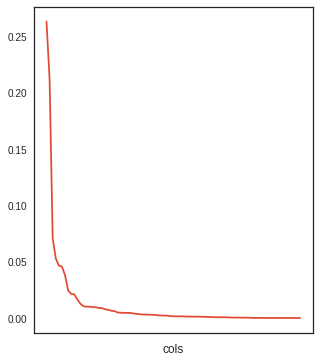

In [18]:

fi.plot('cols','imp',figsize=(5,6),legend=False)

In [0]:

def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

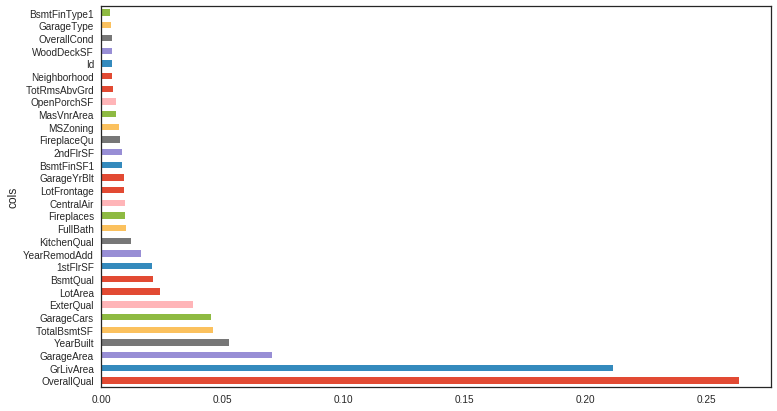

In [20]:
plot_fi(fi[:30]);

In [50]:
to_keep = fi[fi.imp>0.0014].cols; len(to_keep)

8

In [0]:

df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [52]:
m=RandomForestRegressor(n_estimators=100, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


CPU times: user 180 ms, sys: 20 ms, total: 200 ms
Wall time: 161 ms
[0.08755165756712785, 0.23242723226437007, 0.9499079769008321, 0.6641136354879298, -98.89394773947129]


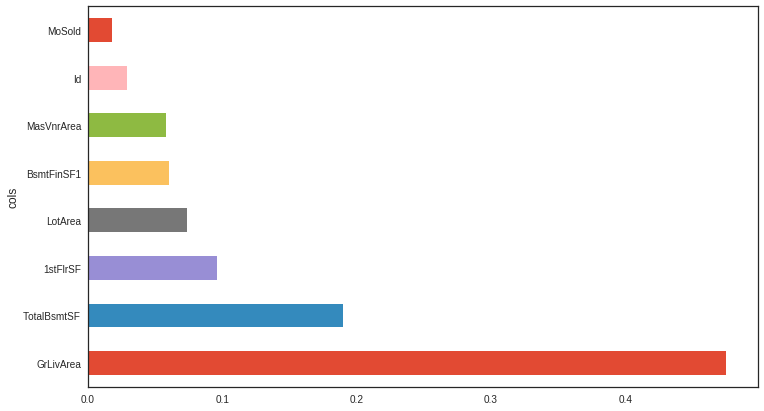

In [53]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

In [54]:
set_rf_samples(1000)
df_trn2, y_trn, nas = proc_df(data_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[0.0479547317833857, 0.1620085328484002, 0.9849719455751331, 0.8368097790085185, -103.78828615615743]


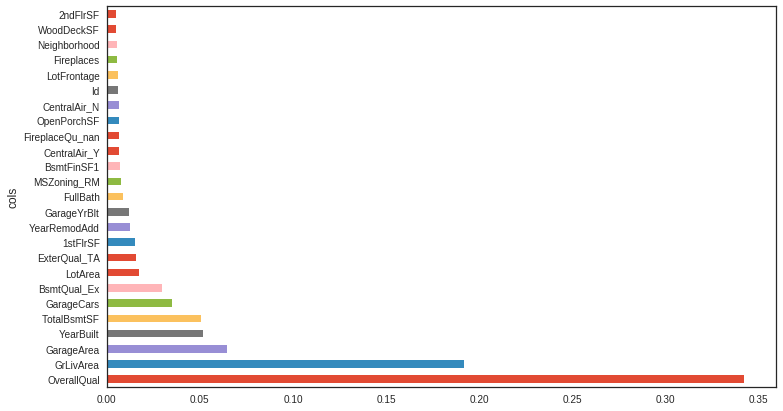

In [55]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

In [0]:
from scipy.cluster import hierarchy as hc

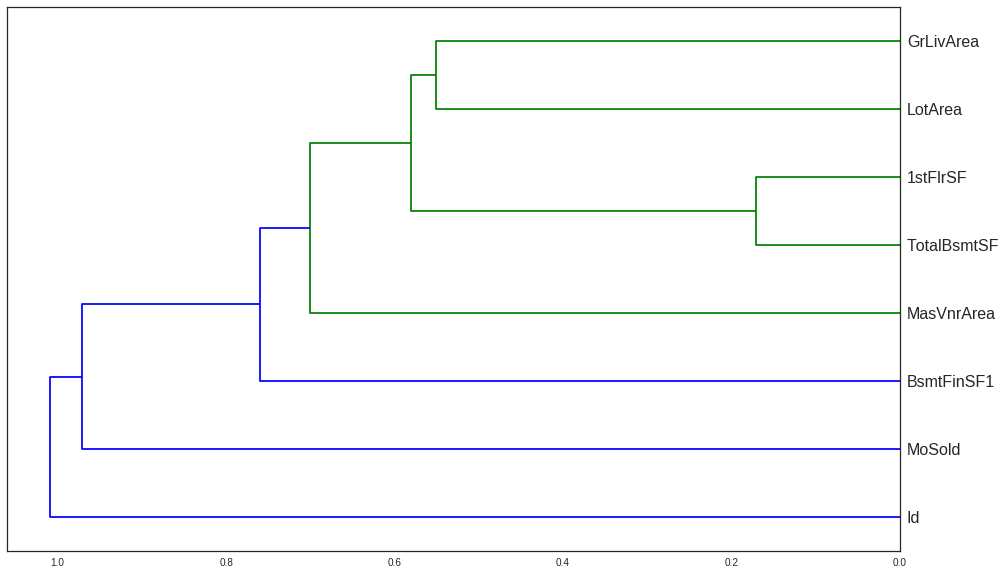

In [57]:

corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [0]:

def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [59]:

get_oob(df_keep)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-510.74106105923573

In [60]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9986301369863013

In [62]:
fi = rf_feat_importance(m, x); fi[:]

,cols,imp
0,Id,0.972217
1,LotArea,0.005930
7,MasVnrArea,0.004689
6,1stFlrSF,0.003934
3,TotalBsmtSF,0.003777
4,GrLivArea,0.003561
5,BsmtFinSF1,0.003177
2,MoSold,0.002714


In [0]:
train_cats(data_val)

In [0]:
df_sp, _, nas = proc_df(data_val)

In [65]:
to_keep

25             Id
7         LotArea
36         MoSold
4     TotalBsmtSF
1       GrLivArea
17     BsmtFinSF1
9        1stFlrSF
21     MasVnrArea
Name: cols, dtype: object

In [0]:
tcols = df_sp[['LotArea', 'GarageCars','ExterQual','TotalBsmtSF','YearBuilt','GarageArea','OverallQual','GrLivArea']]

In [67]:
tcols.head()

,LotArea,GarageCars,ExterQual,TotalBsmtSF,YearBuilt,GarageArea,OverallQual,GrLivArea
0,11622,1.0,4,882.0,1961,730.0,5,896
1,14267,1.0,4,1329.0,1958,312.0,6,1329
2,13830,2.0,4,928.0,1997,482.0,5,1629
3,9978,2.0,4,926.0,1998,470.0,6,1604
4,5005,2.0,3,1280.0,1992,506.0,8,1280


In [0]:
saleprice = m.predict(tcols)

In [0]:
df_sp['SalePrice'] = saleprice

In [70]:
df_sp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,BsmtFinSF1_na,BsmtFinSF2_na,BsmtUnfSF_na,TotalBsmtSF_na,BsmtFullBath_na,BsmtHalfBath_na,GarageYrBlt_na,GarageCars_na,GarageArea_na,SalePrice
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,False,False,False,False,False,1
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,1
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,1
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,False,False,False,False,False,1
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,False,False,False,False,False,1


In [0]:
results = df_sp[['Id','SalePrice']]

In [0]:
results.head()

In [0]:
results.to_csv('results.csv',index=False)

In [0]:
data_val